In [19]:
import rasterio as rio

B2 = rio.open('../img/T21JUL_20240719T135701_B02_10m.tif')


In [20]:
from pyproj import Transformer

env_size = (B2.height, B2.width)
print('env_size:', env_size)
print('B2.shape:', B2.shape)
print('B2.count:', B2.count)
print('B2.crs:', B2.crs)

utm_epsg_code = B2.crs
wgs84_epsg_code = 'EPSG:4326'  # WGS84（緯度経度）に変換

transformer = Transformer.from_crs(utm_epsg_code, wgs84_epsg_code, always_xy=True)

# 緯度経度
height, width = B2.height, B2.width

# ピクセル座標を緯度経度に変換
# 四隅の座標を取得
corners = [
		B2.xy(0, 0),               # 左上
		B2.xy(0, width - 1),       # 右上
		B2.xy(height - 1, 0),      # 左下
		B2.xy(height - 1, width - 1)  # 右下
]

# 結果を表示
for i, (x, y) in enumerate(corners):
		longitude, latitude = transformer.transform(x, y)
		print(f"Corner {i+1}: Latitude, Longitude: ({latitude}, {longitude})")

env_size: (10980, 10980)
B2.shape: (10980, 10980)
B2.count: 1
B2.crs: EPSG:32721
Corner 1: Latitude, Longitude: (-26.20549929717919, -59.00164357909627)
Corner 2: Latitude, Longitude: (-26.21659717340129, -57.902989378664756)
Corner 3: Latitude, Longitude: (-27.196177881203653, -59.01904082888667)
Corner 4: Latitude, Longitude: (-27.207762175181088, -57.910842850169374)


In [21]:
# 緯度軽度をピクセル座標に変換する関数
def latlon_to_pixel(lat, lon, raster):
		transformer = Transformer.from_crs('EPSG:4326', raster.crs, always_xy=True)
		x, y = transformer.transform(lon, lat)
		row, col = raster.index(x, y)
		return row, col

Latitude, Longitude: (-27.135989, -58.111153) -> Pixel: (10200, 8988)


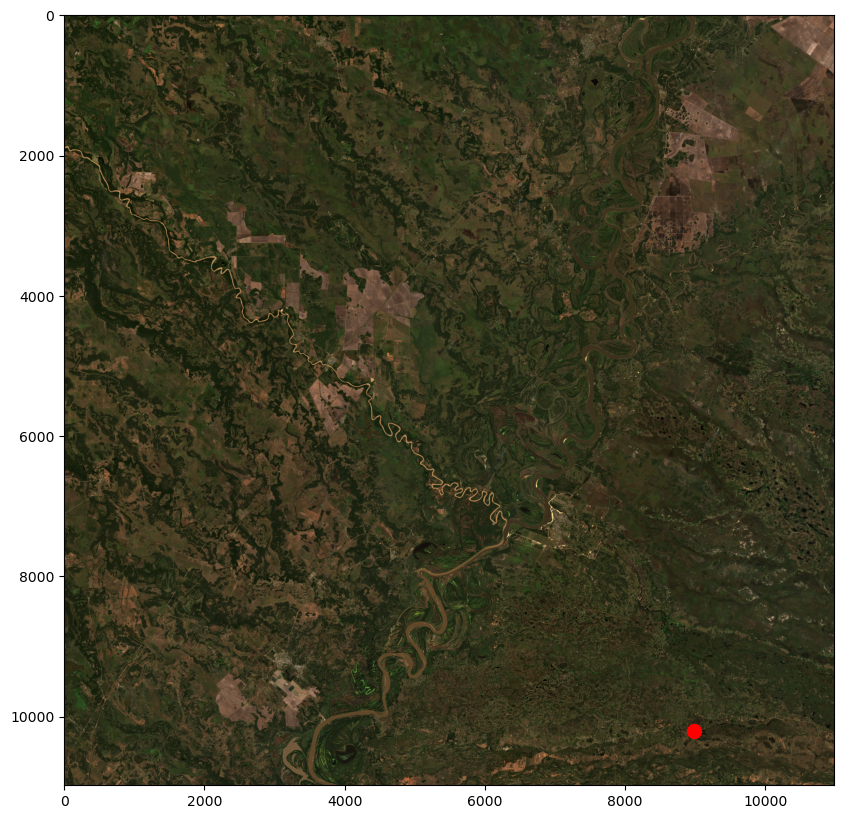

In [25]:
lon, lat = -58.111153, -27.135989
row, col = latlon_to_pixel(lat, lon, B2)
print(f"Latitude, Longitude: ({lat}, {lon}) -> Pixel: ({row}, {col})")


TCI = rio.open('../img/T21JUL_20240719T135701_TCI_10m.tif')

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(TCI.read([1, 2, 3]).transpose(1, 2, 0))
# row, colの位置を薄く大きくプロット
plt.scatter(col, row, color='red', s=100)



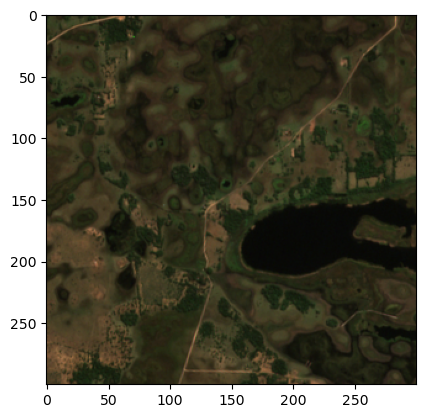

In [24]:
# row, colの周辺を抽出
import numpy as np
window = 150
row_start = max(0, row - window)
row_end = min(TCI.height, row + window)
col_start = max(0, col - window)
col_end = min(TCI.width, col + window)

img_np = TCI.read([1, 2, 3])[:, row_start:row_end, col_start:col_end].transpose(1, 2, 0)
plt.imshow(img_np)

# row, colの周辺を抽出する関数
def extract_window(raster, row, col, window_size):
		row_start = max(0, row - window_size)
		row_end = min(raster.height, row + window_size)
		col_start = max(0, col - window_size)
		col_end = min(raster.width, col + window_size)
		return raster.read([1, 2, 3])[:, row_start:row_end, col_start:col_end].transpose(1, 2, 0)

In [4]:
import numpy as np
B2 = B2.read().transpose([1,2,0]).astype('float')
print(f"Max of sat: {np.max(B2)}")
print(f"Min of sat: {np.min(B2)}")

Max of sat: 19568.0
Min of sat: 0.0


In [5]:
import matplotlib.pyplot as plt

def rgb_plot(rgb_data, title=None):
    plt.figure(figsize=(10, 8))
    img = plt.imshow(rgb_data)
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()


/home/saiga/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


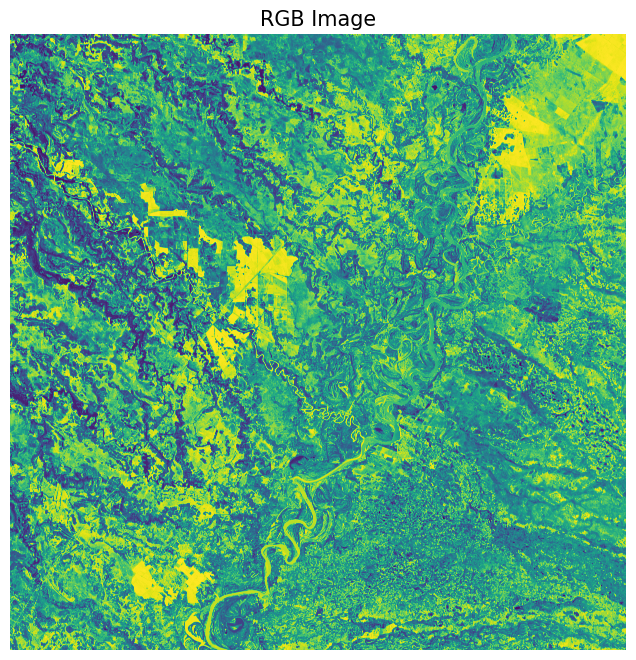

In [10]:
from skimage import exposure
# 正規化
B2_norm = (B2 - np.min(B2)) / (np.max(B2) - np.min(B2))
equalized_array = exposure.equalize_hist(B2_norm)
rgb_plot(equalized_array, title='RGB Image')

In [5]:
import common

# ここからスタート

In [ ]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

import common

# データの読み込み
# B2 = rio.open('../img/T21JUL_20240719T135701_B02_10m.tif')
# B3 = rio.open('../img/T21JUL_20240719T135701_B03_10m.tif')
B4 = rio.open('../img/T21JUL_20240719T135701_B04_10m.tif')
B8 = rio.open('../img/T21JUL_20240719T135701_B08_10m.tif')
# B8A = rio.open('../img/T21JUL_20240719T135701_B8A_20m.tif')
# B11 = rio.open('../img/T21JUL_20240719T135701_B11_20m.tif')

window_size = 10
lon, lat = -58.111153, -27.135989
row, col = common.latlon_to_pixel(lat, lon, B4)
print(f"Latitude, Longitude: ({lat}, {lon}) -> Pixel: ({row}, {col})")

# B2 = common.extract_window_from_band(B2, row, col, window_size)
# B3 = common.extract_window_from_band(B3, row, col, window_size)
B4 = common.extract_window_from_band(B4, row, col, window_size)
B8 = common.extract_window_from_band(B8, row, col, window_size)
# B8A = common.extract_window_from_band(B8A, row, col, window_size)
# B11 = common.extract_window_from_band(B11, row, col, window_size)

print(f"B2: {B2}")


Latitude, Longitude: (-27.135989, -58.111153) -> Pixel: (10200, 8988)
B2: <open DatasetReader name='../img/T21JUL_20240719T135701_B02_10m.tif' mode='r'>


In [7]:
NDVI = (B8 - B4) / (B8 + B4)


TypeError: unsupported operand type(s) for -: 'DatasetReader' and 'DatasetReader'

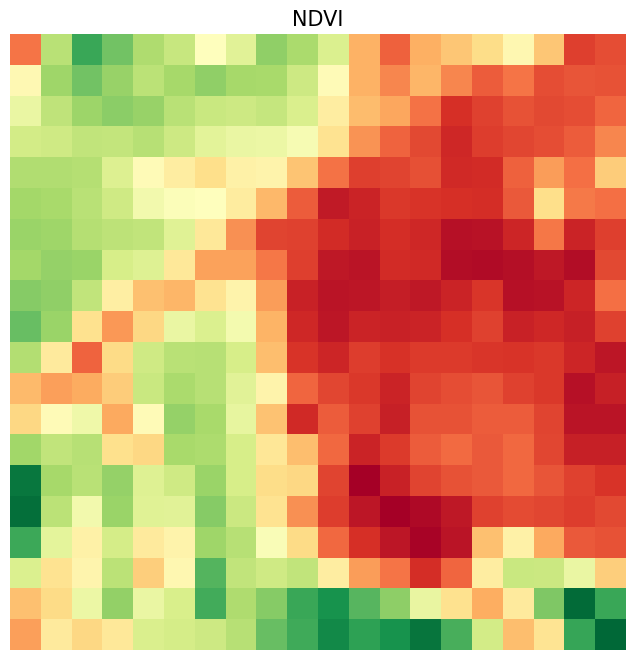

In [9]:
# NDVI = common.normalize_and_histeq(NDVI)
common.rgb_plot(NDVI, title='NDVI')

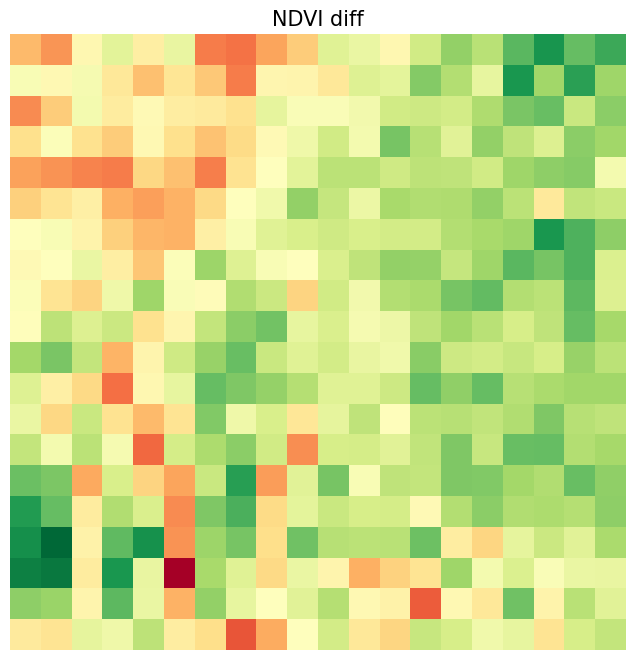

20240719 mean: 0.3268286229267067
20240721 mean: 0.3381419410878768


In [25]:
# 20240721T134709
B4_aft = rio.open('../img/T21JUL_20240721T134709_B04_10m.tif')
B8_aft = rio.open('../img/T21JUL_20240721T134709_B08_10m.tif')

# window_size = 10
# lon, lat = -58.111153, -27.135989
# row, col = common.latlon_to_pixel(lat, lon, B2)
# print(f"Latitude, Longitude: ({lat}, {lon}) -> Pixel: ({row}, {col})")

B4_aft = common.extract_window_from_band(B4_aft, row, col, window_size)
B8_aft = common.extract_window_from_band(B8_aft, row, col, window_size)
NDVI_aft = (B8_aft - B4_aft) / (B8_aft + B4_aft)
common.rgb_plot(NDVI - NDVI_aft, title='NDVI diff')
print('20240719 mean:', np.mean(NDVI))
print('20240721 mean:', np.mean(NDVI_aft))


[0.27559507 0.41092736 0.46998867 0.4466355  0.41759714 0.4032634
 0.36308927 0.38511628 0.43230016 0.41993721 0.39047223 0.30519327
 0.26613283 0.30349531 0.31695332 0.33068678 0.3540856  0.31724279
 0.24994736 0.25692695 0.35568862 0.42526903 0.44628099 0.42862815
 0.41057935 0.42229659 0.43268835 0.42198654 0.42065086 0.39972006
 0.35860435 0.30511628 0.28313796 0.30705394 0.28344856 0.26370757
 0.27554928 0.25604261 0.26019336 0.25910064 0.37811388 0.40725474
 0.42718635 0.43507973 0.42936508 0.41176471 0.40213077 0.39925834
 0.40481044 0.39068401 0.34456763 0.31135697 0.29902169 0.2742268
 0.24132299 0.25       0.25837321 0.25418327 0.25679513 0.26835443
 0.3959325  0.39782135 0.40654787 0.40600122 0.41195608 0.39900249
 0.38389831 0.3777874  0.37707787 0.36877076 0.33595285 0.2892842
 0.26662549 0.25390544 0.23677787 0.24861878 0.25323625 0.25667351
 0.2634998  0.28410513 0.41549725 0.41638514 0.41414141 0.38871885
 0.3576476  0.34482759 0.33176249 0.34846029 0.35045045 0.3157894

Text(0.5, 0, 'スコア')

/home/saiga/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  func(*args, **kwargs)
/home/saiga/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from current font.
  func(*args, **kwargs)
/home/saiga/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  func(*args, **kwargs)
/home/saiga/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/saiga/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO})

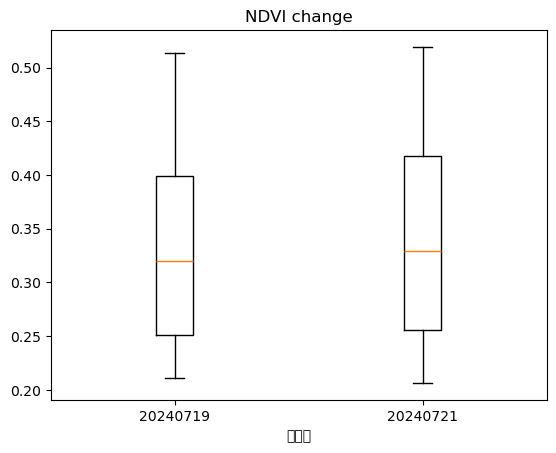

In [24]:
print(NDVI.ravel())
plt.boxplot([NDVI.ravel(), NDVI_aft.ravel()], labels=['20240719', '20240721'])
plt.title('NDVI change')
plt.xlabel('スコア')

max: 1200.0
min: -0.26595744680851063


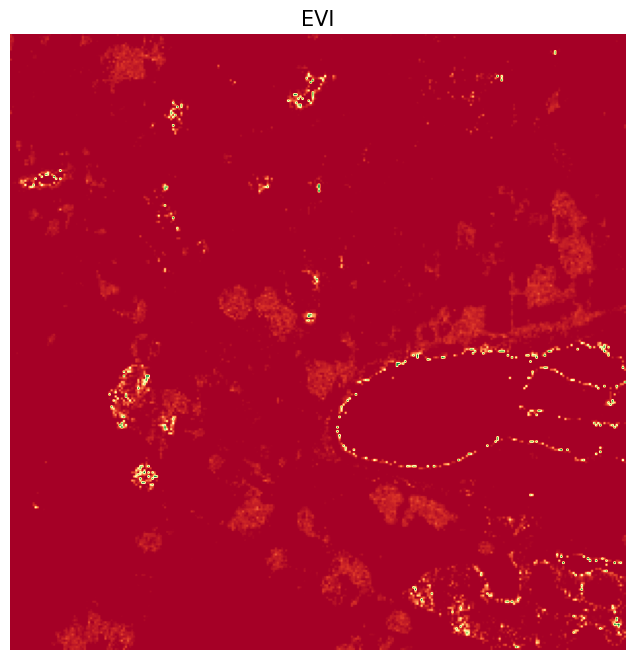

In [2]:
import matplotlib.pyplot as plt
# EVI = 2.5 * (B8 - B4) / (B8 + 6*B4 - 7.5*B2 + 1)
denominator = (B8 + 6*B4 - 7.5*B2 + 1)

# マスク処理: 分母が0.0001以下の場合は無効化
epsilon = 0.0001
mask = denominator > epsilon
denominator = np.where(mask, denominator, np.nan)  # 分母が小さい場合はNaNに

# EVIの計算
EVI = np.where(mask, 2.5 * (B8 - B4) / denominator, np.nan)
print('max:', np.nanmax(EVI))
print('min:', np.nanmin(EVI))

common.rgb_plot(common.normalize_and_histeq(EVI), title='EVI')
# plt.subplot(1, 2, 1)
# plt.imshow(EVI)
# # plt.title("histogram")
# plt.subplot(1, 2, 2)
# plt.hist(EVI.ravel(), bins=100, color='blue', alpha=0.7)
# plt.title("histogram")
# print(f"EVI: {EVI}")

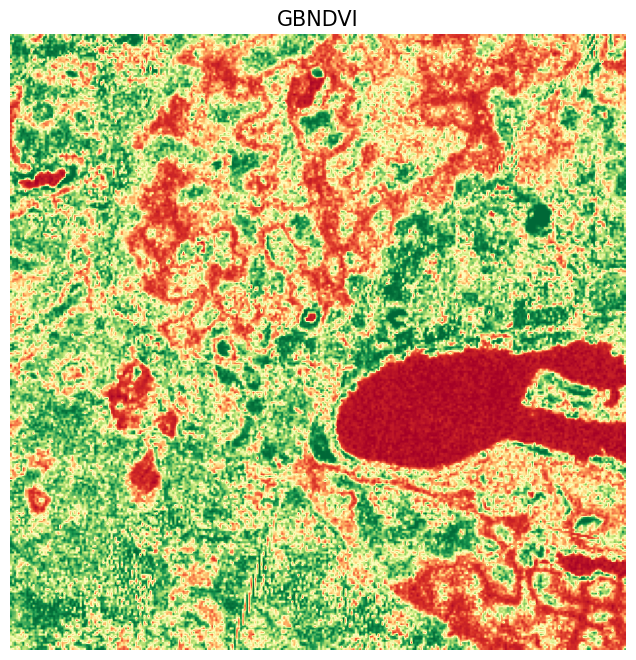

In [3]:
# GBNDVI = (B3 - B2) / (B3 - B2)
epsilon = 1e-10
GBNDVI = (B3 - B2) / (B3 + B2 + epsilon)
# plot
common.rgb_plot(common.normalize_and_histeq(GBNDVI), title='GBNDVI')


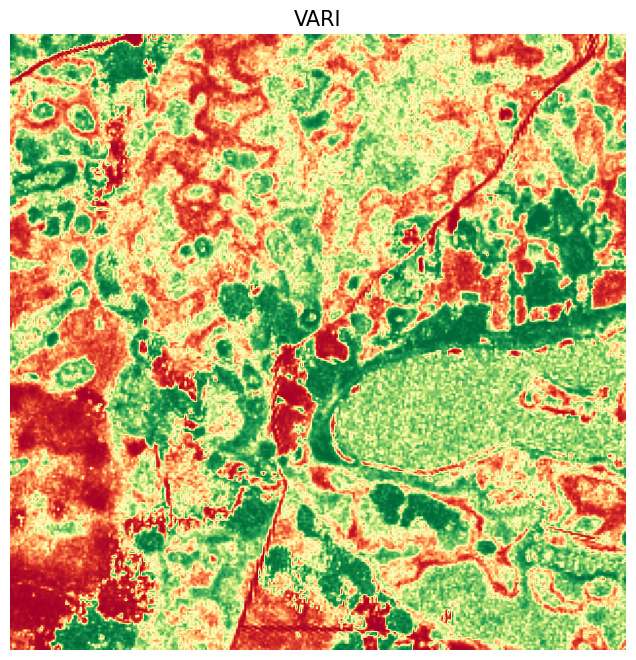

In [5]:
VARI = (B3 - B4) / (B3 + B4 - B2)
common.rgb_plot(common.normalize_and_histeq(VARI), title='VARI')


In [5]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

import common

# データの読み込み
# B4 = rio.open('../img/T21JUL_20240719T135701_B04_10m.tif')
# B8 = rio.open('../img/T21JUL_20240719T135701_B08_10m.tif')
B4 = rio.open('../img/T21JUL_20240721T134709_B04_10m.tif')
B8 = rio.open('../img/T21JUL_20240721T134709_B08_10m.tif')


b4_array = B4.read(1).astype('float')
b8_array = B8.read(1).astype('float')
NDVI = (b8_array - b4_array) / (b8_array + b4_array)

meta = B4.meta.copy()
meta.update({
		"count": 1,  # 出力バンド数
		"dtype": "float32"
})

# with rio.open('../data/ndvi_20240719.tif', 'w', **meta) as dst:
with rio.open('../data/ndvi_20240721.tif', 'w', **meta) as dst:
    dst.write(NDVI.astype(rio.float32), 1)



/tmp/ipykernel_4487/598065995.py:16: RuntimeWarning: invalid value encountered in divide
  NDVI = (b8_array - b4_array) / (b8_array + b4_array)


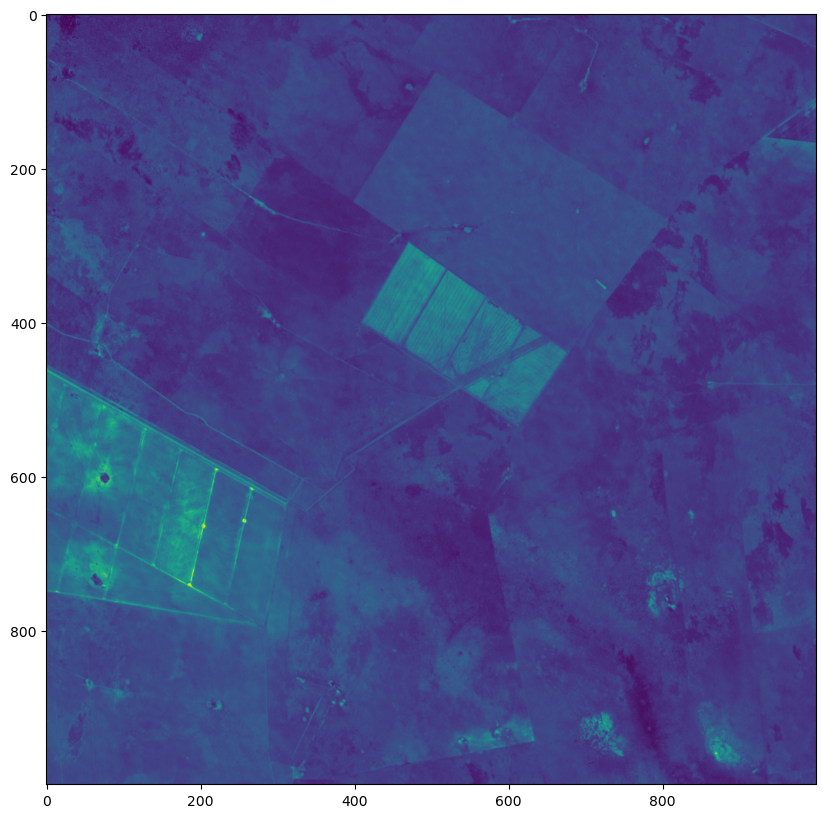

In [26]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

import common

# データの読み込み
B4 = rio.open('../img/T21JUL_20240719T135701_B04_10m.tif')

window_size = 500
# lon, lat = -58.111153, -27.135989
# row, col = common.latlon_to_pixel(lat, lon, B4)
# print(f"Latitude, Longitude: ({lat}, {lon}) -> Pixel: ({row}, {col})")

row, col = 1500, 9800

B4 = common.extract_window_from_band(B4, row, col, window_size)

# plt.imshow(B4)

TCI = rio.open('../img/T21JUL_20240719T135701_TCI_10m.tif')

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(TCI.read([1, 2, 3]).transpose(1, 2, 0))
# plt.scatter(col, row, color='red', s=100)
plt.imshow(B4)
